In [2]:
# pipenv install pandas seaborn pyplot scikit-learn matplotlib scipy ipywidgets ipykernel optuna streamlit

# EDA e Visualização de Dados
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

# ML
from sklearn.cluster import AgglomerativeClustering, BisectingKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

# Otimização
import optuna

### Carregar os Dados

In [3]:
# Carregar Dataframe
df_laptops = pd.read_csv('./datasets/laptops_new.csv')

In [53]:
# Analisar a Estrutura
df_laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     991 non-null    int64  
 1   brand                     991 non-null    object 
 2   model                     991 non-null    object 
 3   price                     991 non-null    float64
 4   rating                    991 non-null    int64  
 5   processor_brand           991 non-null    object 
 6   processor_tier            991 non-null    object 
 7   num_cores                 991 non-null    int64  
 8   num_threads               991 non-null    int64  
 9   ram_memory                991 non-null    int64  
 10  primary_storage_type      991 non-null    object 
 11  primary_storage_capacity  991 non-null    int64  
 12  gpu_brand                 991 non-null    object 
 13  gpu_type                  991 non-null    object 
 14  is_touch_s

In [54]:
# Visualizar os primeiros registros
df_laptops.head(10)

,index,brand,model,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,primary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,os,year_of_warranty,cluster
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,287.72,63,intel,core i3,2,4,8,...,512,intel,integrated,0,15.6,1920,1080,windows,1,73
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,431.64,67,intel,core i7,4,8,16,...,1024,intel,integrated,0,15.6,1920,1080,windows,1,44
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,612.86,73,amd,ryzen 5,6,12,8,...,512,amd,dedicated,0,15.6,1920,1080,windows,1,28
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,479.62,62,intel,core i5,12,16,8,...,512,intel,integrated,0,14.0,1920,1080,windows,1,53
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,342.77,62,amd,ryzen 3,4,8,8,...,512,amd,integrated,0,15.6,1920,1080,windows,1,14
5,6,apple,Apple MacBook Air 2020 MGND3HN Laptop (Apple M...,851.41,45,apple,m1,8,8,8,...,256,apple,apple,0,13.3,2560,1600,mac,1,113
6,7,infinix,Infinix INBook Y2 Plus Laptop (11th Gen Core i...,419.65,56,intel,core i5,4,8,16,...,512,intel,integrated,0,15.6,1920,1080,windows,1,4
7,8,asus,Asus TUF Gaming F15 FX506HF-HN024W Gaming Lapt...,599.55,70,intel,core i5,6,12,8,...,512,nvidia,dedicated,0,15.6,1920,1080,windows,1,19
8,9,hp,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,443.64,60,intel,core i3,6,8,8,...,512,intel,integrated,0,15.6,1920,1080,windows,1,95
9,10,infinix,Infinix Zerobook 2023 Laptop (13th Gen Core i9...,719.48,71,intel,core i9,14,20,32,...,1024,intel,integrated,0,15.6,1920,1080,windows,1,83


In [55]:
# Visualizar os ultimos registros
df_laptops.tail(10)

,index,brand,model,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,primary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,os,year_of_warranty,cluster
981,993,msi,MSI Katana 15 B13VFK-296IN Gaming Laptop (13th...,1439.09,76,intel,core i7,10,16,16,...,1024,nvidia,dedicated,0,15.6,1920,1080,windows,2,21
982,994,asus,Asus Zenbook 14 OLED 2023 UM3402YA-KM551WS Lap...,935.36,68,amd,ryzen 5,6,12,16,...,1024,amd,integrated,0,14.0,2880,1800,windows,1,86
983,995,asus,Asus Vivobook 16 2023 M1605YA-MB551WS Laptop (...,803.44,65,amd,ryzen 5,6,12,16,...,1024,amd,integrated,0,16.0,1920,1200,windows,1,116
984,996,asus,Asus Vivobook 16 2023 M1605YA-MB541WS Laptop (...,719.48,64,amd,ryzen 5,6,12,16,...,512,amd,integrated,0,16.0,1920,1200,windows,1,37
985,997,acer,Acer Nitro 5 AN515-47 NH.QL3SI.003 Gaming Lapt...,905.50,67,amd,ryzen 7,8,16,8,...,512,nvidia,dedicated,0,15.6,1920,1080,windows,1,11
986,998,asus,Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...,791.44,68,amd,ryzen 5,6,12,16,...,512,nvidia,dedicated,0,15.6,1920,1080,windows,1,85
987,999,msi,MSI Thin GF63 12VE-070IN Gaming Laptop (12th G...,1103.27,73,intel,core i7,10,16,16,...,512,nvidia,dedicated,0,15.6,1920,1080,windows,2,7
988,1000,asus,Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...,539.58,59,amd,ryzen 5,4,8,8,...,512,amd,integrated,0,15.6,1920,1080,windows,1,64
989,1001,asus,Asus Zenbook 14 2023 UM3402YA-KP541WS Laptop (...,815.43,68,amd,ryzen 5,6,12,16,...,512,amd,integrated,0,14.0,2560,1600,windows,1,115
990,1002,hp,HP Chromebook 15a-na0008TU Laptop (Intel Celer...,251.74,37,intel,celeron,2,2,4,...,128,intel,integrated,0,15.6,1366,768,chrome,1,36


### EDA

In [10]:
# Estatísticas das Variáveis
df_laptops.describe()

,index,price,rating,num_cores,num_threads,ram_memory,primary_storage_capacity,display_size,resolution_width,resolution_height,year_of_warranty
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,505.860747,926.687487,63.931382,8.128153,12.191726,13.047427,610.938446,15.171241,2003.503532,1181.227043,1.083754
std,287.899458,688.239764,10.190575,4.215499,5.585115,5.591188,266.927666,0.938089,361.965292,263.884019,0.311478
min,1.000000,117.540000,24.000000,2.000000,0.000000,2.000000,32.000000,10.100000,1080.000000,768.000000,1.000000
25%,258.500000,522.850000,58.000000,6.000000,8.000000,8.000000,512.000000,14.000000,1920.000000,1080.000000,1.000000
50%,507.000000,742.390000,64.000000,8.000000,12.000000,16.000000,512.000000,15.600000,1920.000000,1080.000000,1.000000
75%,754.500000,1070.350000,71.000000,10.000000,16.000000,16.000000,512.000000,15.600000,1920.000000,1200.000000,1.000000
max,1002.000000,5450.880000,89.000000,24.000000,32.000000,36.000000,2048.000000,18.000000,3840.000000,2560.000000,3.000000


In [8]:
# Checar variável year_of_warranty
df_laptops['year_of_warranty'].unique()

array(['1', '2', 'No information', '3'], dtype=object)

In [9]:
# Ajustar variável year_of_warranty
df_laptops.loc[df_laptops['year_of_warranty'] == 'No information', 'year_of_warranty'] = 1
df_laptops['year_of_warranty'] = df_laptops['year_of_warranty'].astype(int)

In [12]:
# Transformar variável booleana em int (is_touch_screen)
df_laptops['is_touch_screen'] = df_laptops['is_touch_screen'].astype(int)

In [15]:
# Distribuição da variável brand
percentual_brand = df_laptops.value_counts('brand') / len(df_laptops) * 100
px.bar(percentual_brand, color=percentual_brand.index)

In [16]:
# Distribuição da variável processor_brand
percentual_processor_brand = df_laptops.value_counts('processor_brand') / len(df_laptops) * 100
px.bar(percentual_processor_brand, color=percentual_processor_brand.index)

<Axes: xlabel='price', ylabel='Count'>

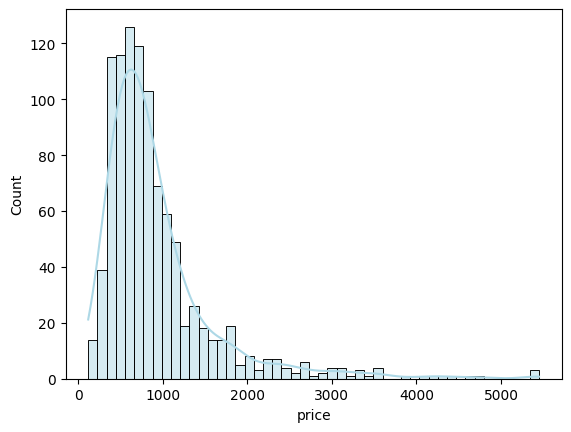

In [18]:
# Distribuição da variável price
sns.histplot(df_laptops['price'], kde=True, color='lightblue')

<Axes: xlabel='rating', ylabel='Count'>

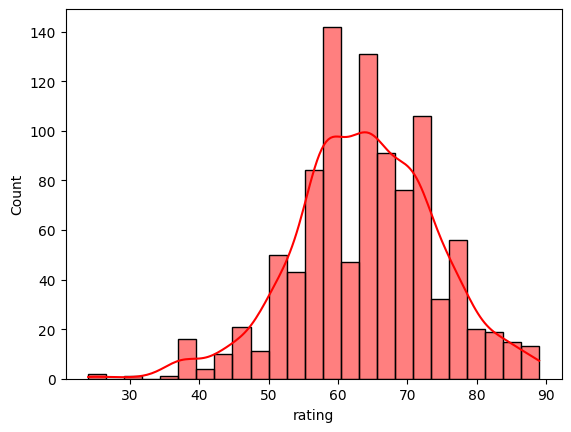

In [19]:
# Distribuição da Variável Rating
sns.histplot(df_laptops['rating'], kde=True, color='red')

In [20]:
# Plot de Distribuição (BoxPlot) por Brand e Price
px.box(df_laptops, x='price', y='brand', color='brand', orientation='h')

In [21]:
# Plot de Distribuição (BoxPlot) por Brand e Rating
px.box(df_laptops, x='rating', y='brand', color='brand', orientation='h')

In [22]:
# Scatterplot de Price e Rating
px.scatter(df_laptops, x='price', y='rating', color='brand')

### Treinar modelos clustering hierarquico

In [23]:
# Selecionar as colunas para clusterização
X = df_laptops.copy()

# Remover colunas desnecessárias
X.drop(columns=['index', 'model'], axis=1, inplace=True)

In [25]:
# Separando variáveis numericas e categoricas
numeric_features = ['price', 'rating', 'num_cores', 'num_threads', 'ram_memory', 'primary_storage_capacity',
                    'display_size', 'resolution_width', 'resolution_height']
categorical_features = ['brand', 'processor_brand', 'gpu_brand', 'gpu_type', 'os']

In [26]:
# Definir transformações
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

In [28]:
# Criar Pre Processador de Transformações
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [29]:
# Transformar os dados
X_transformed = preprocessor.fit_transform(X)

In [35]:
# Visualizar X_transformed
X_transformed

<991x54 sparse matrix of type '<class 'numpy.float64'>'
	with 13874 stored elements in Compressed Sparse Row format>

In [36]:
def hierarchical_aglomerative_objective(trial):
    # Definindo os hiperparâmetros a serem ajustados
    n_clusters = trial.suggest_int('n_clusters', 10, 150)
    # Linkage = Critério de distância entre dois conjuntos para formar os clusters
    # Ward = Variância
    # Average = Media
    # Complete = Máxima
    # Single = Miníma
    linkage = trial.suggest_categorical('linkage', ['ward', 'average', 'complete', 'single'])

    # Instanciar o modelo
    hierarchical_model = AgglomerativeClustering(linkage=linkage, n_clusters=n_clusters)

    # Treinar o modelo e já executar a clusterização
    y = hierarchical_model.fit_predict(X_transformed.toarray())

    # Calcular o Silhouette Score
    silhouette_avg = silhouette_score(X_transformed, y)

    return silhouette_avg

In [37]:
# Criar um estudo no Optuna
search_space_ag = {'n_clusters': range(10, 151), 'linkage': ['ward', 'average', 'complete', 'single']}
sampler_ag = optuna.samplers.GridSampler(search_space=search_space_ag)
estudo_ag = optuna.create_study(direction='maximize', sampler=sampler_ag)

[I 2024-04-22 23:42:25,849] A new study created in memory with name: no-name-4a497edb-b41e-48cf-822c-25402dc82d29


In [39]:
# Executar estudo do Optuna para Aglomerative
estudo_ag.optimize(hierarchical_aglomerative_objective, n_trials=600)

[I 2024-04-22 23:43:18,365] Trial 0 finished with value: 0.09729502744855044 and parameters: {'n_clusters': 28, 'linkage': 'single'}. Best is trial 0 with value: 0.09729502744855044.
[I 2024-04-22 23:43:18,399] Trial 1 finished with value: 0.1981129477494152 and parameters: {'n_clusters': 71, 'linkage': 'average'}. Best is trial 1 with value: 0.1981129477494152.
[I 2024-04-22 23:43:18,432] Trial 2 finished with value: 0.15065460744693257 and parameters: {'n_clusters': 25, 'linkage': 'average'}. Best is trial 1 with value: 0.1981129477494152.
[I 2024-04-22 23:43:18,463] Trial 3 finished with value: 0.055793152112915884 and parameters: {'n_clusters': 137, 'linkage': 'single'}. Best is trial 1 with value: 0.1981129477494152.
[I 2024-04-22 23:43:18,492] Trial 4 finished with value: 0.05436585966019916 and parameters: {'n_clusters': 140, 'linkage': 'single'}. Best is trial 1 with value: 0.1981129477494152.
[I 2024-04-22 23:43:18,522] Trial 5 finished with value: 0.2302511296057063 and param

In [42]:
# Mostrar melhor configuração do Optuna (Aglomerative)
best_params_ag = estudo_ag.best_params

print(f'Clusters = {best_params_ag['n_clusters']}')
print(f'Linkage = {best_params_ag['linkage']}')

Clusters = 149
Linkage = ward


In [43]:
def hierarchical_divisive_objective(trial):
    # Definindo os hiperparâmetros a serem ajustados
    n_clusters = trial.suggest_int('n_clusters', 10, 150)

    # Instanciar o modelo
    hierarchical_model = BisectingKMeans(n_clusters=n_clusters)

    # Treinar o modelo e já executar a clusterização
    y = hierarchical_model.fit_predict(X_transformed.toarray())

    # Calcular o Silhouette Score
    silhouette_avg = silhouette_score(X_transformed, y)

    return silhouette_avg

In [44]:
# Criar um estudo no Optuna
search_space_di = {'n_clusters': range(10, 151)}
sampler_di = optuna.samplers.GridSampler(search_space=search_space_di)
estudo_di = optuna.create_study(direction='maximize', sampler=sampler_di)

[I 2024-04-22 23:53:08,541] A new study created in memory with name: no-name-d0931cc1-b65a-4362-ba06-ad342668bb00


In [45]:
# Executar estudo do Optuna para Aglomerative
estudo_di.optimize(hierarchical_divisive_objective, n_trials=200)

[I 2024-04-22 23:54:03,430] Trial 0 finished with value: 0.14863924754325616 and parameters: {'n_clusters': 37}. Best is trial 0 with value: 0.14863924754325616.
[I 2024-04-22 23:54:03,467] Trial 1 finished with value: 0.11916424541188153 and parameters: {'n_clusters': 24}. Best is trial 0 with value: 0.14863924754325616.
[I 2024-04-22 23:54:03,550] Trial 2 finished with value: 0.19512271878872625 and parameters: {'n_clusters': 128}. Best is trial 2 with value: 0.19512271878872625.
[I 2024-04-22 23:54:03,606] Trial 3 finished with value: 0.15426980822236774 and parameters: {'n_clusters': 72}. Best is trial 2 with value: 0.19512271878872625.
[I 2024-04-22 23:54:03,679] Trial 4 finished with value: 0.17017179910481078 and parameters: {'n_clusters': 117}. Best is trial 2 with value: 0.19512271878872625.
[I 2024-04-22 23:54:03,759] Trial 5 finished with value: 0.19979169770738558 and parameters: {'n_clusters': 132}. Best is trial 5 with value: 0.19979169770738558.
[I 2024-04-22 23:54:03,78

In [47]:
# Mostrar melhor configuração do Optuna (Divisive)
best_params_di = estudo_di.best_params

print(f'Clusters = {best_params_di['n_clusters']}')

Clusters = 124


In [48]:
# Criar Modelo com melhor configuração (Aglomerative)
best_model = AgglomerativeClustering(
    n_clusters=best_params_ag['n_clusters'],
    linkage=best_params_ag['linkage']
)

In [49]:
# Treinar Modelo
best_model.fit(X_transformed.toarray())

AgglomerativeClustering(n_clusters=149)

In [51]:
# Verificar Silhouette Score
best_score = silhouette_score(X_transformed, best_model.labels_)
best_score

0.3274548072143168

In [52]:
# Criar Coluna com cluster escolhido no Dataframe original
df_laptops['cluster'] = best_model.labels_

### Visualizar Resultados

In [56]:
# Mostrar Chart com Trials do Optuna
fig = optuna.visualization.plot_optimization_history(estudo_ag)
fig.show()

In [57]:
# Treinar modelo com Scipy
modelo_de = linkage(X_transformed.toarray(), method=best_params_ag['linkage'], optimal_ordering=True)

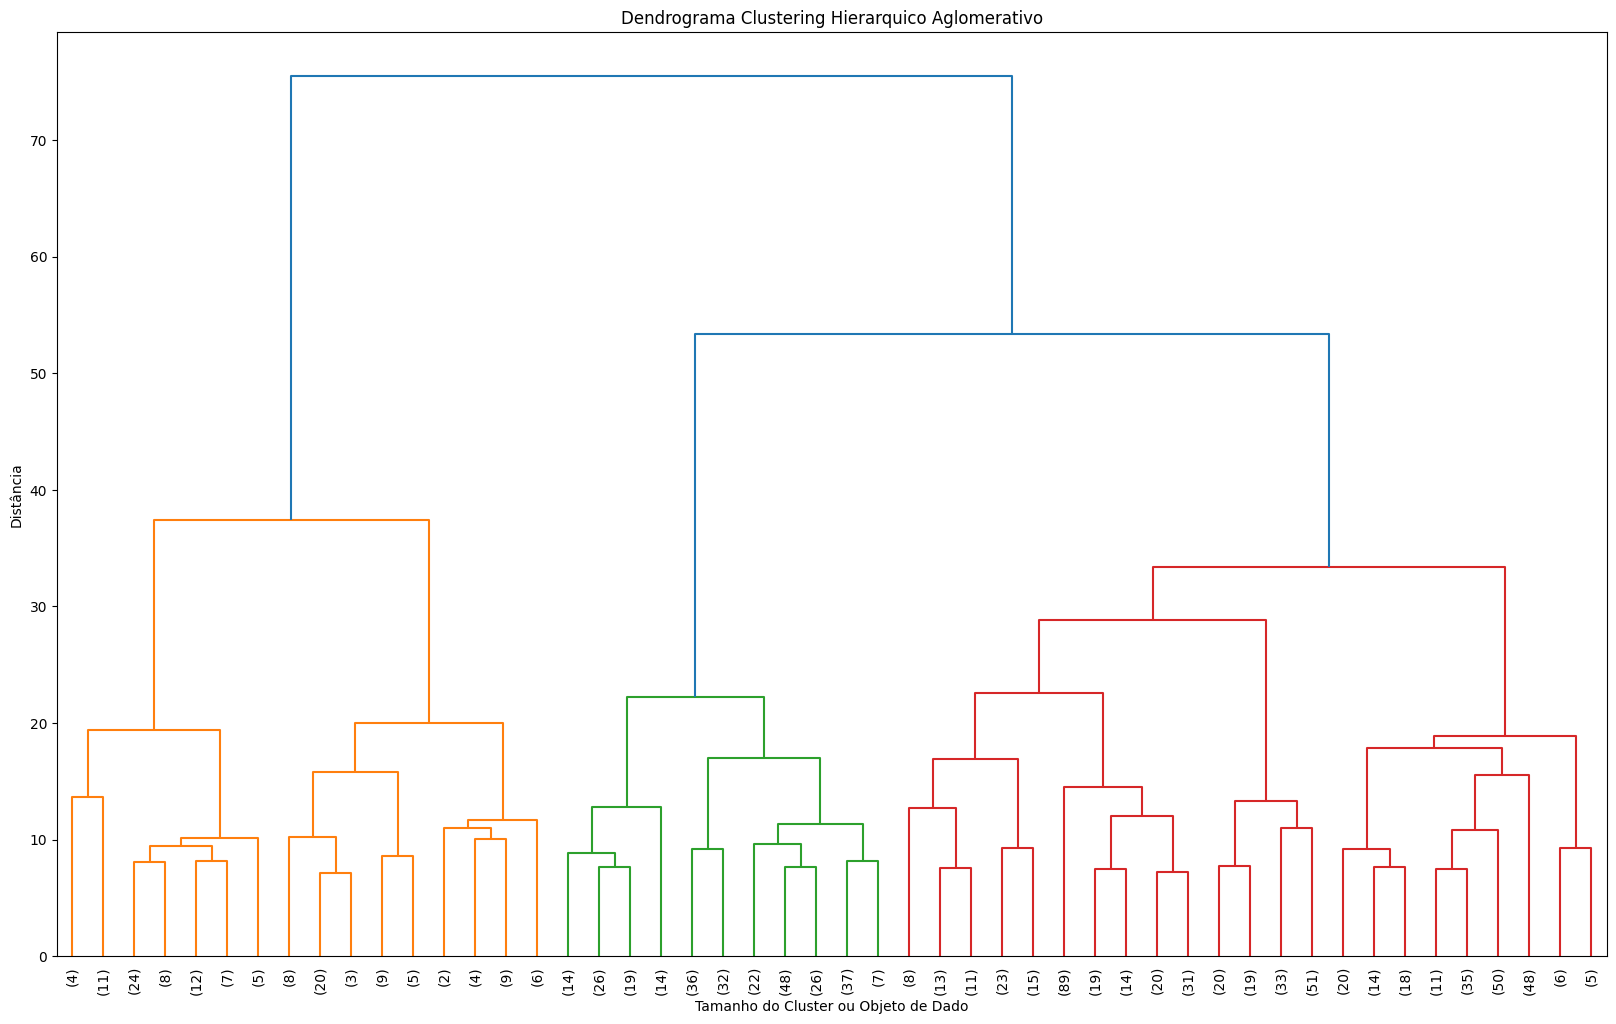

In [64]:
# Mostrar Dendrograma
plt.figure(figsize=(20,12))
dendrogram(modelo_de, truncate_mode='lastp', p=50, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrograma Clustering Hierarquico Aglomerativo')
plt.xlabel('Tamanho do Cluster ou Objeto de Dado')
plt.ylabel('Distância')
plt.show()

In [66]:
# Cortar o dendrograma
clusters_de_scipy = cut_tree(modelo_de, height=32)
len(np.unique(clusters_de_scipy))

5

In [ ]:
# Cruzamento entre brand e price, apresentando os clusters
px.scatter(df_laptops, x='brand', y='price', color='cluster')

In [68]:
# Cruzamento entre brand e price, apresentando os clusters
px.scatter(df_laptops, x='cluster', y='price', color='brand')

In [70]:
# Cruzamento entre brand e rating, apresentando os clusters
px.scatter(df_laptops, x='brand', y='rating', color='cluster')

In [71]:
# Cruzamento entre brand e rating, apresentando os clusters
px.scatter(df_laptops, x='cluster', y='rating', color='brand')

In [72]:
# Distribuição da variável cluster
percentual_cluster = df_laptops.value_counts('cluster') / len(df_laptops) * 100
px.bar(percentual_cluster, color=percentual_cluster.index)

In [73]:
# Distribuição da variável cluster
qtde_cluster = df_laptops.value_counts('cluster')
px.bar(qtde_cluster, color=qtde_cluster.index)

### Salvar Modelo, PreProcessor e CSV Atualizado

In [74]:
# Salvar Modelo e Preprocessor
import joblib

# Salvar o modelo
joblib.dump(best_model, './modelo_clusterizacao_laptops.pkl')

# Salvar o Preprocessor
joblib.dump(preprocessor, './preprocessor_clusterizacao_laptops.pkl')

['./preprocessor_clusterizacao_laptops.pkl']

In [75]:
# Salvar CSV atualizado com dados de cluster
df_laptops.to_csv('./datasets/clusterizacao_laptops.csv', index=False)